# Telecom Customer Churn Prediction (using Python and it's libraries)

In the dynamic realm of telecommunications, maintaining a strong customer base is a vital factor for achieving business success.
Customer churn, often referred to as customer attrition, occurs when customers discontinue their services with a company. 
Churn prediction is a critical task that helps telecom companies identify customers who are likely to churn and take proactive measures to retain them.
This Jupyter Notebook presents a comprehensive analysis and machine learning and deep learning prediction models for telecom customer churn.

### Loading the data and the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


It can be observed that the column TotalCharges is not of a numeric datatype.


## Data Analysis


Text(0, 0.5, 'Count')

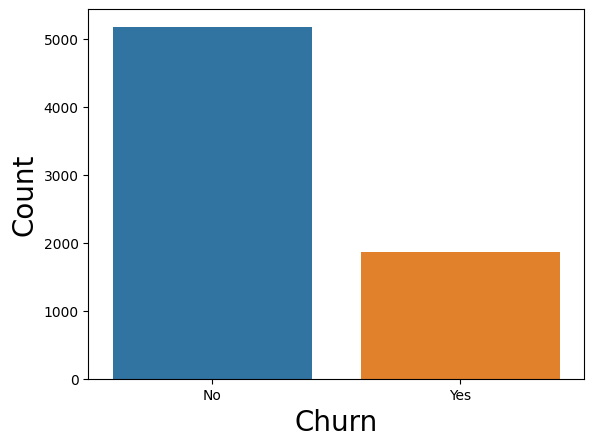

In [4]:
sns.countplot(x='Churn',data=df)
plt.xlabel("Churn", fontsize = 20)
plt.ylabel("Count", fontsize = 20)

The dataset displays a noticeably imbalanced.

<AxesSubplot:xlabel='gender', ylabel='count'>

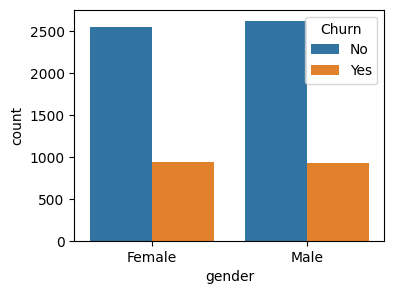

In [5]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x= "gender", hue='Churn')

From the graph it can be seen that churn is not affected by gender. That means stand-alone, gender is not an important feature.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

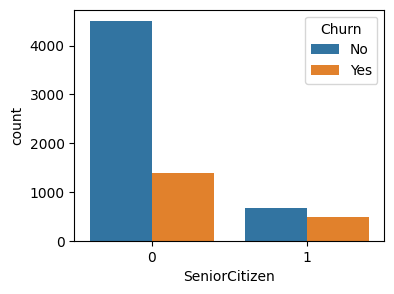

In [6]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x= "SeniorCitizen", hue='Churn')

From the graph it can be seen that senior citizens have higher churn. 

<AxesSubplot:xlabel='Partner', ylabel='count'>

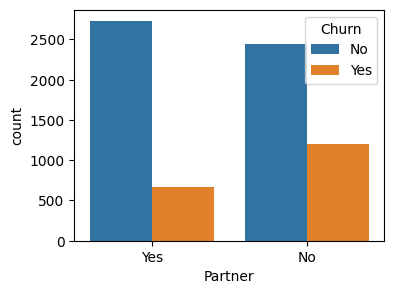

In [7]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x= "Partner", hue='Churn')

From the graph it can be seen that people with partners have lower churn.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

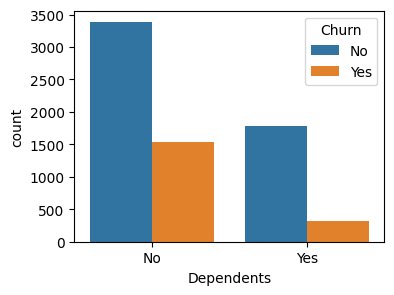

In [8]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x= "Dependents", hue='Churn')

From the graph it can be seen that people with dependents are less likely to churn.

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

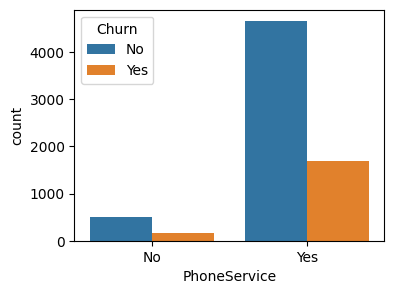

In [9]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x= "PhoneService", hue='Churn')

From the graph it can be seen that people with a phone service are less likely to churn.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

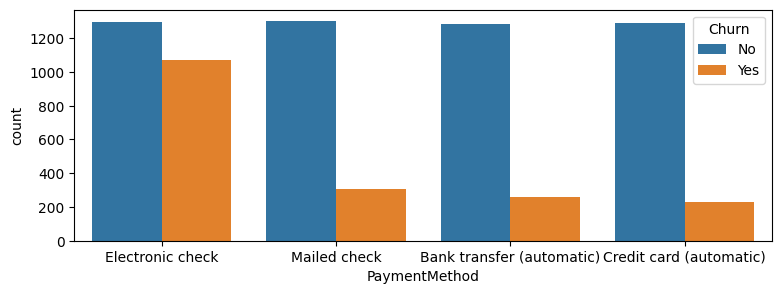

In [10]:
plt.figure(figsize=(9, 3))
sns.countplot(data=df, x= "PaymentMethod", hue='Churn')

From the graph it can be seen that electronic payers have higher churn.

<AxesSubplot:xlabel='Contract', ylabel='count'>

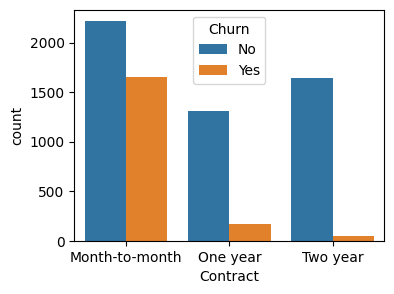

In [11]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x= "Contract", hue='Churn')

From the graph it can be seen that people with month-to-month contracts have higher churn.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

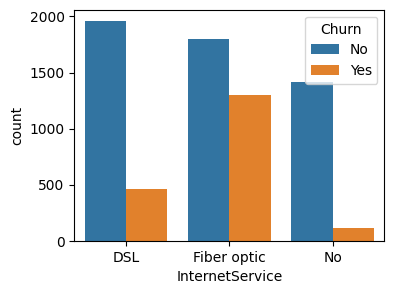

In [12]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x= "InternetService", hue='Churn')

From the graph it can be seen that the people with Fiber optic interneet service have high churn, and people without internet service have low churn.

## Data Cleaning


In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df = df.copy()

A copy is created for performing operations without affecting the original dataset

In [15]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
100* df.isnull().sum()/len(df)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

The process involved converting the "TotalCharges" column to a numerical data type, followed by a check for missing values. It's  evident that 15% of the "TotalCharges" column are missing values.

In [16]:
df.dropna(how = 'any', inplace = True)


Since only a relatively small number of rows have missing data, it is possible to remove those rows.

In [17]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
dummies=(["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService",
          "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
          "Contract","PaperlessBilling","PaymentMethod"])
dfw = pd.get_dummies(df, columns=dummies, drop_first= True )
dfw["Churn"]=np.where(dfw.Churn=="Yes",1,0)
dfw.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,34,56.95,1889.50,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,2,70.70,151.65,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


The data has been transformed into binary values to make it more suited for future machine learning models.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

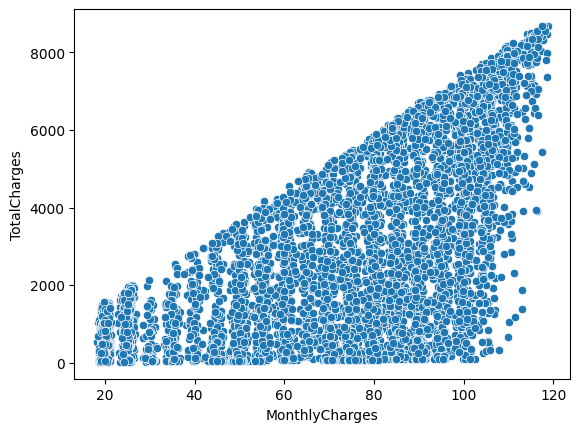

In [19]:
sns.scatterplot(x='MonthlyCharges', y='TotalCharges',data=dfw)

From the graph it can be seen that increase in MonthlyCharges means increase in TotalCharges, which is to be expected.

<AxesSubplot:>

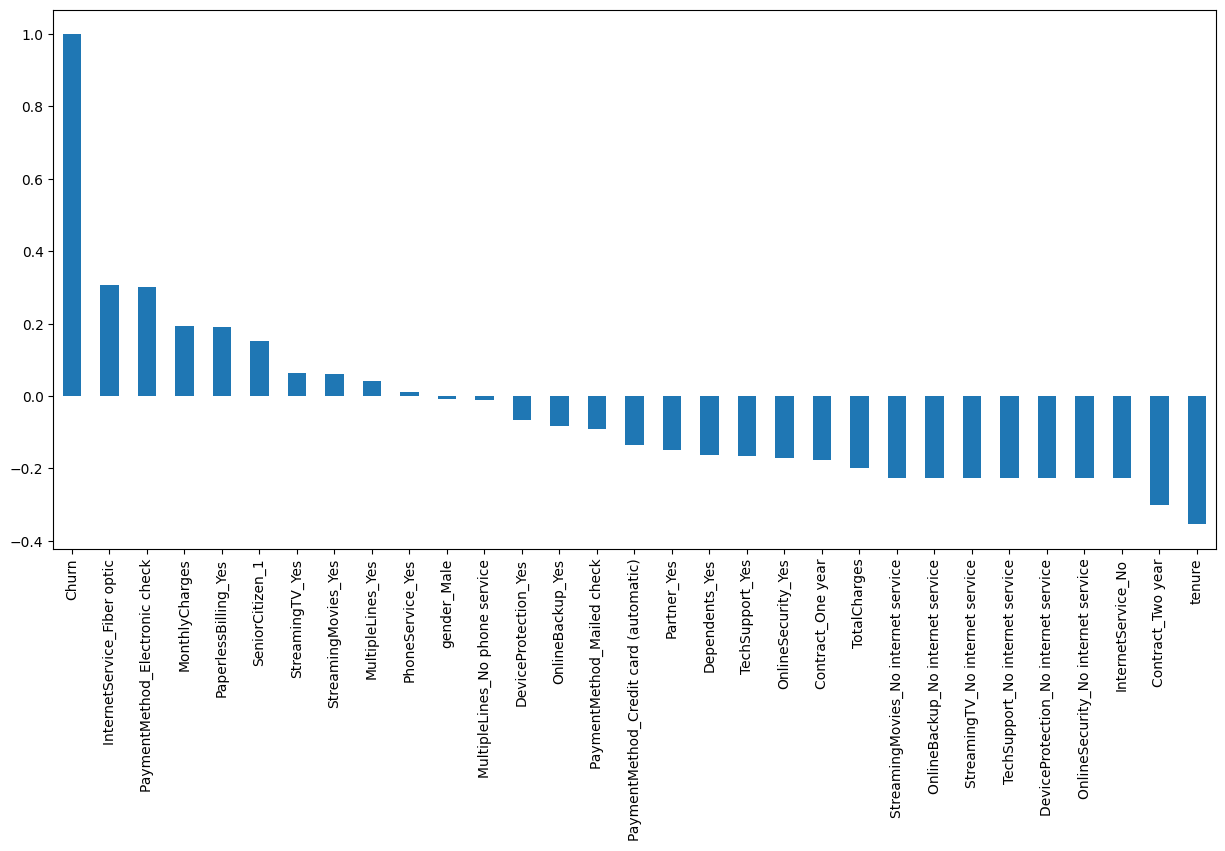

In [20]:
plt.figure(figsize=(15,7))
dfw.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

The various levels of prediction for different variables in relation to "Churn" are observable.

# Model Building

In [21]:
dfw.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,34,56.95,1889.50,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,2,70.70,151.65,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [22]:
dfz = dfw.drop("customerID", axis=1)

In [23]:
X = dfz.drop('Churn',axis=1).values
y = dfz['Churn'].values

The data has been separated into features and target labels. 

## Balancing out the dataset

In [24]:
sm = SMOTEENN()
Xr, yr = sm.fit_resample(X,y)

The dataset has been balanced out using SMOTE and EEN methods.

In [25]:
Xtr,Xte,ytr,yte=train_test_split(Xr, yr,test_size=0.2)

The data has been separated into testing and training sets.

## Normalization

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
Xtr = scaler.fit_transform(Xtr)

In [29]:
Xte = scaler.transform(Xte)

Before the deep learning model is created, the features are first scaled.

# Creating the deep learning model

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [31]:
model = Sequential()

model.add(Dense(64,  activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

A neural network model is created. A sigmoid activation function is used on the output node, since we need binary data.

In [32]:
model.fit(x=Xtr, 
          y=ytr, 
          epochs= 20,
          batch_size=256,
          validation_data=(Xte, yte), 
          )

Epoch 1/20
19/19 [==============================] - 2s 20ms/step - loss: 0.6401 - accuracy: 0.6408 - val_loss: 0.5041 - val_accuracy: 0.8410
Epoch 2/20
19/19 [==============================] - 0s 4ms/step - loss: 0.4570 - accuracy: 0.8360 - val_loss: 0.3627 - val_accuracy: 0.8744
Epoch 3/20
19/19 [==============================] - 0s 4ms/step - loss: 0.3507 - accuracy: 0.8726 - val_loss: 0.2851 - val_accuracy: 0.8846
Epoch 4/20
19/19 [==============================] - 0s 4ms/step - loss: 0.3008 - accuracy: 0.8848 - val_loss: 0.2569 - val_accuracy: 0.8872
Epoch 5/20
19/19 [==============================] - 0s 4ms/step - loss: 0.2814 - accuracy: 0.8933 - val_loss: 0.2424 - val_accuracy: 0.8940
Epoch 6/20
19/19 [==============================] - 0s 4ms/step - loss: 0.2709 - accuracy: 0.8931 - val_loss: 0.2334 - val_accuracy: 0.9017
Epoch 7/20
19/19 [==============================] - 0s 4ms/step - loss: 0.2564 - accuracy: 0.9008 - val_loss: 0.2286 - val_accuracy: 0.9060
Epoch 8/20
19/19 [=

In [33]:
from tensorflow.keras.models import load_model

In [34]:
model.save('Model_for_Project')  

INFO:tensorflow:Assets written to: Model_for_Project\assets


The model has been saved.

## Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dtree = DecisionTreeClassifier()

In [37]:
dtree.fit(Xtr,ytr)

DecisionTreeClassifier()

In [38]:
ypr = dtree.predict(Xte)

An instance of the DecisionTreeClassifier() was created and was fitted to the training data.

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [40]:
print(classification_report(yte,ypr))
print("Confusion Matrix: ")
print(confusion_matrix(yte,ypr))
print("Approximate Accuracy: ", accuracy_score(yte,ypr)*100)


              precision    recall  f1-score   support

           0       0.90      0.94      0.92       516
           1       0.95      0.92      0.93       654

    accuracy                           0.93      1170
   macro avg       0.92      0.93      0.92      1170
weighted avg       0.93      0.93      0.93      1170

Confusion Matrix: 
[[483  33]
 [ 54 600]]
Approximate Accuracy:  92.56410256410257


It can be observed that the model is quite accurate.

## Support Vector Machines

In [41]:
from sklearn.svm import SVC

In [42]:
svc = SVC()

In [43]:
svc.fit(Xtr,ytr)

SVC()

In [44]:
ypr = svc.predict(Xte)

In [45]:
print(classification_report(yte,ypr, zero_division=1))
print("Confusion Matrix: ")
print(confusion_matrix(yte,ypr))
print("Approximate Accuracy: ", accuracy_score(yte,ypr)*100)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       516
           1       0.93      0.94      0.94       654

    accuracy                           0.93      1170
   macro avg       0.93      0.93      0.93      1170
weighted avg       0.93      0.93      0.93      1170

Confusion Matrix: 
[[473  43]
 [ 39 615]]
Approximate Accuracy:  92.99145299145299


It can be observed that the model is not as accurate as the other models.

## Random Forest Classifier (with hyperparameter search)

In [46]:
from sklearn.ensemble import RandomForestClassifier


In [47]:
rfc = RandomForestClassifier(n_estimators=700)


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

rfc = RandomForestClassifier()  # No need to set n_estimators here
grid_search = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)
grid_search.fit(Xtr, ytr)

best_params = grid_search.best_params_
best_rfc_model = grid_search.best_estimator_

ypr = best_rfc_model.predict(Xte)

In [49]:
best_n_estimators = grid_search.best_params_['n_estimators']
print("Best n_estimators:", best_n_estimators)

Best n_estimators: 300


Through hyperparameter search, the optimal number of trees to be used in a forest was determined. Subsequently, the model was fitted to the data.

In [50]:
print(classification_report(yte,ypr))
print("Confusion Matrix: ")
print(confusion_matrix(yte,ypr))
print("Approximate Accuracy: ", accuracy_score(yte,ypr)*100)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       516
           1       0.96      0.95      0.96       654

    accuracy                           0.95      1170
   macro avg       0.95      0.95      0.95      1170
weighted avg       0.95      0.95      0.95      1170

Confusion Matrix: 
[[493  23]
 [ 33 621]]
Approximate Accuracy:  95.2136752136752


It can be observed that the model is very accurate.

# Data was Analysed and the Models were Created Successfully !